# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [ ]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

In [ ]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)
    


Ahora agregamos _outliers_ a un nuevo dataset

In [ ]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)


In [ ]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

In [ ]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


In [ ]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


## Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [167]:
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV


In [168]:
## Parámetros de la simulación
n_exp = 1000
n_samples = 1000
n_features = 10
n_informative = 2
n_targets = 1
noise =  np.linspace(0,50,10)
bias = np.linspace(0,50,5)


#noise = np.linspace(0, 100, 100)
#bias = np.linspace(0, 100, 20)

In [264]:
## Esqueleto de la simulación
## Parámetros de la simulación


def simulate_regression(data, regression_model='LinearRegression', n_exp=100):
    results = []
    coefficients_list =[]   

    for _ in tqdm(range(n_exp)):
        for b in bias:
            for n in noise:
                data = generate_dataset(
                    n_samples=n_samples,
                    n_features=n_features,
                    n_informative=n_informative,
                    n_targets=n_targets,
                    noise=n,
                    bias=b,
                    output='dataframe'
                )
                # Train test split
                X = data.drop('target', axis=1)
                y = data['target']
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

                
                if regression_model == 'LinearRegression':
                    model = LinearRegression()
                elif regression_model == 'HuberRegressor':
                    model = HuberRegressor()
                elif regression_model == 'RidgeCV':
                    model = RidgeCV()


                model.fit(X_train, y_train)
                coefficients = model.coef_ if regression_model != 'HuberRegressor' else model.coef_
                coefficients_list.append(coefficients)

                # Valido predicciones en train y test
                y_train_pred = model.predict(X_train)
                y_test_pred = model.predict(X_test)

                # RMSE y MAE
                rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
                rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

                mae_train = mean_absolute_error(y_train, y_train_pred)
                mae_test = mean_absolute_error(y_test, y_test_pred)

                # Results
                results.append({
                #  'coefficients': coefficients,
                    'RMSE_train': rmse_train,
                    'RMSE_test': rmse_test,
                    'MAE_train': mae_train,
                    'MAE_test': mae_test 
                })
        
    results_df = pd.DataFrame(results)
    coefficients_matrix = np.array(coefficients_list)
    return results_df, coefficients_matrix


In [272]:
dataset_1 = []
for n in np.linspace(0, 50, 10):
    for b in np.linspace(0, 50, 5):
        data = generate_dataset(
            n_samples=1000,
            n_features=10,
            n_informative=2,
            n_targets=1,
            noise=n,
            bias=b,
            output='dataframe'
        )
        datasets.append(data)

selected_regression_model = 'LinearRegression'
results_1, coefficients = simulate_regression(dataset_1, regression_model=selected_regression_model,n_exp=100)
print(results.head())


100%|██████████| 100/100 [00:48<00:00,  2.07it/s]

     RMSE_train     RMSE_test     MAE_train      MAE_test
0  1.916851e-13  1.987994e-13  1.532290e-13  1.567985e-13
1  5.530269e+00  5.728596e+00  4.398363e+00  4.622511e+00
2  1.105249e+01  1.088875e+01  8.883112e+00  8.801562e+00
3  1.649419e+01  1.595186e+01  1.327263e+01  1.245734e+01
4  2.046054e+01  2.163963e+01  1.614326e+01  1.712356e+01


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

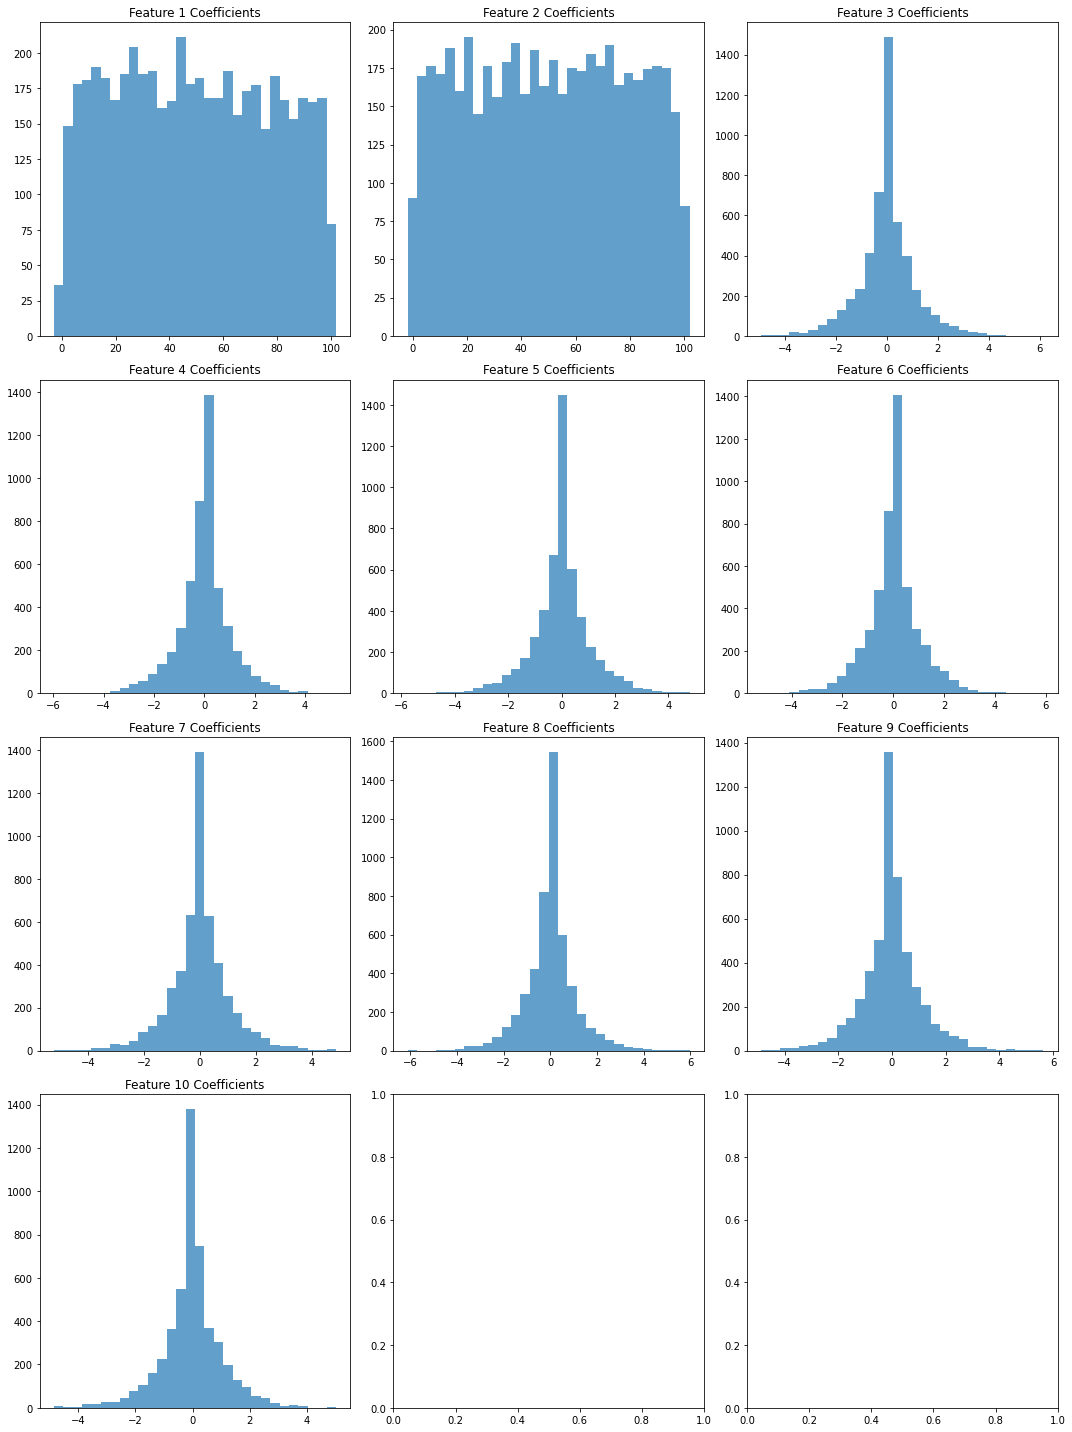

In [236]:
import matplotlib.pyplot as plt

# obtengo columnas de la matriz
num_features = coefficients.shape[1]  
num_plots_per_row = 3  

# Sublots para cada  distribucion
fig, axs = plt.subplots(nrows=num_rows, ncols=num_plots_per_row, figsize=(15, 5 * num_rows))  


# Plot disitribucion para todos los coeficientes de cada feature
for feature_index in range(num_features):
    row_index = feature_index // num_plots_per_row  
    col_index = feature_index % num_plots_per_row  
    
    feature_coefficients = coefficients[:, feature_index]
    axs[row_index, col_index].hist(feature_coefficients, bins=30, alpha=0.7)
    axs[row_index, col_index].set_title(f'Feature {feature_index + 1} Coefficients')

plt.tight_layout()
plt.show()


Como se ve en los gráficos, los coeficientes de las variables no informativas tienen la media en 0. Esto es el modelo debería anularlas. Pero para saber si afectan a los resultados de la regresión lineal, veamos el rmse y mae y luego comparemos con otras corridas: con solo 8 features informativas, con 8 features informativas y 2 no informativas.

In [237]:
def plot_rmse_histogram(results):
    rmse_test_values = results['RMSE_test']

    # Plot histogram of RMSE values from the test set
    plt.figure(figsize=(8, 6))
    plt.hist(rmse_test_values, bins=20, alpha=0.7)
    plt.title('Histogram of RMSE in Test Set')
    plt.xlabel('RMSE Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Corro simulación con 8 features informativas

In [251]:
dataset_2 = []
for n in np.linspace(0, 50, 10):
    for b in np.linspace(0, 50, 5):
        data = generate_dataset(
            n_samples=1000,
            n_features=8,
            n_informative=8,
            n_targets=1,
            noise=n,
            bias=b,
            output='dataframe'
        )
        datasets.append(data)

selected_regression_model = 'LinearRegression'
results_2, coefficients = simulate_regression(dataset_2, regression_model=selected_regression_model,n_exp=100)
print(results.head())

100%|██████████| 100/100 [00:47<00:00,  2.10it/s]


Corro simulación con 10 features y 8 informativas

In [250]:
dataset_3 = []
for n in np.linspace(0, 50, 10):
    for b in np.linspace(0, 50, 5):
        data = generate_dataset(
            n_samples=1000,
            n_features=10,
            n_informative=8,
            n_targets=1,
            noise=n,
            bias=b,
            output='dataframe'
        )
        datasets.append(data)

selected_regression_model = 'LinearRegression'
results_3, coefficients = simulate_regression(dataset_3, regression_model=selected_regression_model,n_exp=100)
print(results.head())

100%|██████████| 100/100 [00:49<00:00,  2.03it/s]


#### Ploteo la distribución del RMSE en los 3 batches de simulaciones

Text(0.5, 1.0, 'RMSE test')

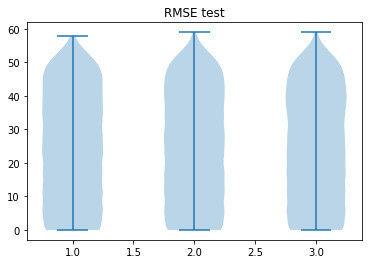

In [252]:
plt.violinplot([results_1.RMSE_test, results_2.RMSE_test, results_3.RMSE_test])
plt.title("RMSE test")

Text(0.5, 1.0, 'MAE_test')

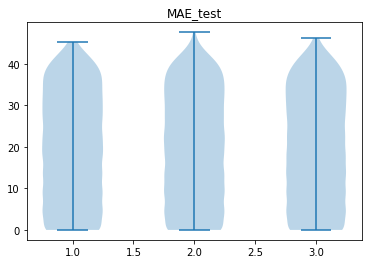

In [253]:
plt.violinplot([results_1.MAE_test, results_2.MAE_test, results_3.MAE_test])
plt.title("MAE_test")

## Conclusiones

Las distribuciones de los errores son iguales. Podemos decir que las variables no informativas no afectan a la regresión.


## Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [289]:

# Generar dataset de regresion lineal simple 1 feature, 1 target value, noise fijo en 0.5
data = generate_dataset(n_samples=1000,
                    n_features=1,
                    n_informative=1,
                    n_targets=1,
                    noise=0.5,
                    random_state=42,
                    output='dataframe')



data_with_outliers = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)


### Ridge 

In [291]:

selected_regression_model = 'RidgeCV'
results_ridge, coefficients = simulate_regression(data_with_outliers, regression_model=selected_regression_model,n_exp=10)
print(results_ridge.head())
print(f"Analysis with {percentage}% outliers:")


100%|██████████| 10/10 [00:03<00:00,  3.15it/s]

   RMSE_train  RMSE_test  MAE_train   MAE_test
0    0.022536   0.021510   0.018259   0.017332
1    5.397856   5.427282   4.375345   4.436759
2   11.359413  11.122479   9.015287   9.154167
3   16.477194  16.835989  13.207736  13.189445
4   22.360088  22.520914  17.841816  17.644147
Analysis with 10% outliers:


### Huber Regressor

In [282]:
selected_regression_model = 'HuberRegressor'
results_huber, coefficients = simulate_regression(data_with_outliers, regression_model=selected_regression_model,n_exp=10)
print(results_huber.head())

 70%|███████   | 7/10 [00:04<00:02,  1.40it/s]/Users/mtaglio/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
 80%|████████  | 8/10 [00:05<00:01,  1.36it/s]/Users/mtaglio/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
100%|██████████| 10/10 [00:07<00:00,  1.34it/s]

     RMSE_train     RMSE_test     MAE_train      MAE_test
0  1.458760e-11  1.529491e-11  1.165828e-11  1.232130e-11
1  5.433844e+00  5.397897e+00  4.321709e+00  4.140385e+00
2  1.129842e+01  1.088740e+01  8.885621e+00  8.679206e+00
3  1.659796e+01  1.634551e+01  1.329005e+01  1.299551e+01
4  2.199070e+01  2.219164e+01  1.756703e+01  1.797344e+01


### Linear Regression

In [284]:
selected_regression_model = 'LinearRegression'
results_linear, coefficients = simulate_regression(data_with_outliers, regression_model=selected_regression_model,n_exp=10)
print(results_linear.head())

100%|██████████| 10/10 [00:03<00:00,  2.70it/s]

     RMSE_train     RMSE_test     MAE_train      MAE_test
0  8.739097e-14  8.915310e-14  6.923713e-14  7.018164e-14
1  5.402637e+00  5.631854e+00  4.325291e+00  4.553495e+00
2  1.088418e+01  1.097648e+01  8.624073e+00  8.854680e+00
3  1.603713e+01  1.576518e+01  1.261679e+01  1.290303e+01
4  2.233668e+01  2.185070e+01  1.804487e+01  1.768141e+01


### Violin plot

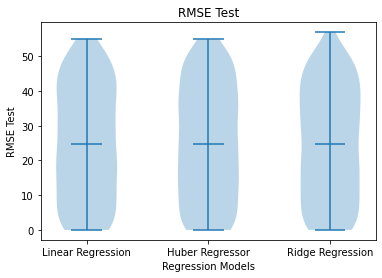

In [287]:
data_for_violin = [results_linear.RMSE_test, results_huber.RMSE_test, results_ridge.RMSE_test]
labels = ['Linear Regression', 'Huber Regressor', 'Ridge Regression']

plt.violinplot(data_for_violin, showmeans=False, showmedians=True)
plt.title("RMSE Test")

plt.xticks(range(1, len(labels) + 1), labels)
plt.xlabel("Regression Models")
plt.ylabel("RMSE Test")
plt.show()

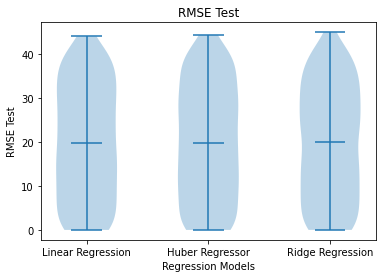

In [288]:
data_for_violin = [results_linear.MAE_test, results_huber.MAE_test, results_ridge.MAE_test]
labels = ['Linear Regression', 'Huber Regressor', 'Ridge Regression']

plt.violinplot(data_for_violin, showmeans=False, showmedians=True)
plt.title("RMSE Test")

plt.xticks(range(1, len(labels) + 1), labels)
plt.xlabel("Regression Models")
plt.ylabel("RMSE Test")
plt.show()

## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [292]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [309]:
# 1. C1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado por nr de épocas pero también por tolerancia.
def GD(X_train, y_train, X_test, y_test, initial_theta, learning_rate, max_epochs=100, tolerance=1e-5):
    theta = initial_theta.copy()
    train_loss = []
    test_loss = []

    for epoch in range(max_epochs):
        # Computo gradientes
        grad = gradient(X_train, y_train, theta)

        # actualizo parametros con gd
        theta -= learning_rate * grad

        # Calculo losses
        train_pred = X_train.dot(theta)
        train_mse = np.mean((y_train - train_pred) ** 2)
        train_loss.append(train_mse)

        test_pred = X_test.dot(theta)
        test_mse = np.mean((y_test - test_pred) ** 2)
        test_loss.append(test_mse)

        # chequear que se cumpla la condicion de frenado por tolerancia
        if epoch > 0 and abs(train_loss[-1] - train_loss[-2]) < tolerance:
            break

    return train_loss, test_loss, theta


In [310]:
# 2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
data = generate_dataset(n_samples=1000,
                    n_features=1,
                    n_informative=1,
                    n_targets=1,
                    bias = 5,
                    random_state=42,
                    output='dataframe')

X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print("Shapes - X_train:", X_train.shape, "y_train:", y_train.shape, "X_test:", X_test.shape, "y_test:", y_test.shape)


X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.ravel()


In [311]:
# 3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
initial_theta = np.random.rand(X_train.shape[1])

In [312]:
# 4. Tratamos de calcular los mejores parámetros con el algoritmo.
learning_rate = 0.0001
max_epochs = 100
tolerance = 1e-5
gd_train_loss, gd_test_loss, optimized_theta = GD(X_train, y_train, X_test, y_test, initial_theta, learning_rate, max_epochs, tolerance)

In [314]:
# 5. Guardamos la función de perdida en train y test en cada época.
print("Final optimized parameters:", optimized_theta)
print("Train Loss:", gd_train_loss)
print("Test Loss:", gd_test_loss)

Final optimized parameters: [1.14216396]
Train Loss: [372.5404363268739, 372.44744963503575, 372.3544984793228, 372.2615828461546, 372.16870272195564, 372.0758580931557, 371.98304894618997, 371.89027526749817, 371.79753704352584, 371.7048342607235, 371.6121669055468, 371.51953496445657, 371.4269384239188, 371.3343772704048, 371.24185149039084, 371.14936107035845, 371.05690599679446, 370.9644862561905, 370.87210183504396, 370.7797527198566, 370.6874388971362, 370.5951603533949, 370.5029170751506, 370.410709048926, 370.3185362612491, 370.226398698653, 370.1342963476759, 370.04222919486136, 369.9501972267577, 369.8582004299189, 369.76623879090357, 369.6743122962756, 369.5824209326043, 369.49056468646376, 369.39874354443344, 369.30695749309774, 369.21520651904626, 369.12349060887385, 369.03180974918024, 368.9401639265705, 368.8485531276547, 368.75697733904815, 368.6654365473711, 368.57393073924896, 368.4824599013124, 368.39102402019694, 368.2996230825436, 368.20825707499785, 368.1169259842

#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [315]:
# 1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
def SGD(X_train, y_train, X_test, y_test, initial_theta, learning_rate, max_epochs=100, tolerance=1e-5, batch_size=1):
    theta = initial_theta.copy()
    train_loss = []
    test_loss = []

    for epoch in range(max_epochs):

        indices = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            if i + batch_size <= len(X_train):
                X_batch = X_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]
            else:
                X_batch = X_train_shuffled[i:]
                y_batch = y_train_shuffled[i:]

            grad = gradient(X_batch, y_batch, theta)

            # actualizo params usando sgd
            theta -= learning_rate * grad

        # Calculo losses para cada epoch
        train_pred = X_train.dot(theta)
        train_mse = np.mean((y_train - train_pred) ** 2)
        train_loss.append(train_mse)

        test_pred = X_test.dot(theta)
        test_mse = np.mean((y_test - test_pred) ** 2)
        test_loss.append(test_mse)

        # condicion de frenado
        if epoch > 0 and abs(train_loss[-1] - train_loss[-2]) < tolerance:
            break

    return train_loss, test_loss, theta


In [316]:
# 2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
data = generate_dataset(n_samples=1000,
                    n_features=1,
                    n_informative=1,
                    n_targets=1,
                    bias = 5,
                    random_state=42,
                    output='dataframe')

X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Shapes - X_train:", X_train.shape, "y_train:", y_train.shape, "X_test:", X_test.shape, "y_test:", y_test.shape)

X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.ravel()


Shapes - X_train: (800, 1) y_train: (800,) X_test: (200, 1) y_test: (200,)


In [318]:
# 3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
initial_theta = np.random.rand(X_train.shape[1])

In [319]:
# 4. Tratamos de calcular los mejores parámetros con el algoritmo.
learning_rate = 0.0001
max_epochs = 100
tolerance = 1e-5
batch_size = 2
sgd_train_loss, sgd_test_loss, optimized_theta = SGD(X_train, y_train, X_test, y_test, initial_theta, learning_rate, max_epochs, tolerance, batch_size)

In [320]:
# 5. Guardamos la función de perdida en train y test en cada época.
 # Store the loss function for train and test at each epoch
print("Final optimized parameters:", optimized_theta)
print("Train Loss:", sgd_train_loss)
print("Test Loss:", sgd_test_loss)

Final optimized parameters: [16.95941739]
Train Loss: [334.58411972976586, 305.7775015231143, 280.9370976440968, 259.4887032651799, 240.9805890772267, 224.9910645344376, 211.22119708150632, 199.2960324449488, 189.0312210765824, 180.17617162730167, 172.5155076556534, 165.89502702731872, 160.19559444203244, 155.2647891668239, 151.01962943214286, 147.3509291861292, 144.18677875689266, 141.45472045270998, 139.09531099122287, 137.0640839610147, 135.30902354109844, 133.80305242744416, 132.49740510171551, 131.36988160459282, 130.3971059375988, 129.55595575994877, 128.8341409567696, 128.20874665550508, 127.66361946253717, 127.19634658556477, 126.78891183226675, 126.44417572507264, 126.14545129484017, 125.88897464857672, 125.66596316799037, 125.47397550061505, 125.30679663111579, 125.16339386093463, 125.0388450373151, 124.93018982945924, 124.83724365296857, 124.75707442804476, 124.68798497013864, 124.62857665994967, 124.5772190557038, 124.53289990336121, 124.49485056725338, 124.46297902618939, 

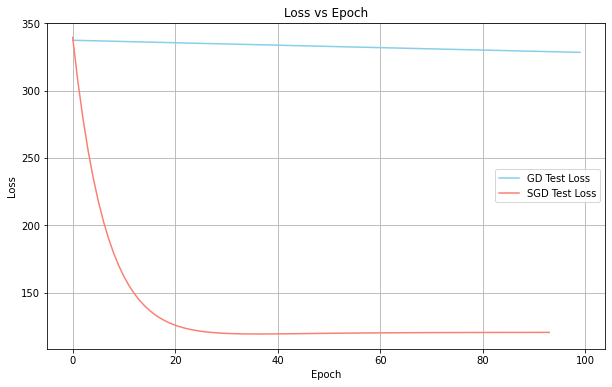

In [321]:
# Loss vs Epoch
plt.figure(figsize=(10, 6))
epochs_gd = range(len(gd_train_loss))
epochs_sgd = range(len(sgd_train_loss))

#plt.plot(epochs_gd, gd_train_loss, label='GD Train Loss', color='blue')
plt.plot(epochs_gd, gd_test_loss, label='GD Test Loss', color='skyblue')
#plt.plot(epochs_sgd, sgd_train_loss, label='SGD Train Loss', color='red')
plt.plot(epochs_sgd, sgd_test_loss, label='SGD Test Loss', color='salmon')

plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

1. Con un learning rate = 0.1, lo que se ve a partir de las losses es que GD performa mejor, para la misma cantidad de epochs, la loss disminuye mucho más que utilizando SGD. También se observa que la loss con GD arranca en un valor mucho más alto pero converge más rápido, mientras que con SGD si bien arranca en un valor más bajo, no converge y tiene varias fluctuaciones, o sea no es estable.

En cambio, probando con un learning rate más bajo = 0.01, observamos que la loss con SGD converge mucho más rápido y es relativamente estable. Se ve que al utilizar un lr más bajo SGD hace una búsqueda más precisa en el espacio de parámetros y esto le permite navegar más cerca de la solución óptima.  En definitiva, se reducen o mehjor dicho se suavizan las fluctuaciones. 

Utilizando una lr aun más bajo = 0.0001 es aun más conveniente para SGD que para GD, se suavizan aun más las fluctuaciones y converge más rápido al mínimo local.

### Ejercicio 7

En este ejercicio vamos a considerar la regresión logística como un problema de clasificación binaria.
La implementación de la misma podemos considerar la siguiente:

```python

class LogisticRegressionSGD():
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, random_state=42):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.weights = None
        self.loss = None
        self.loss_history = None
        self.grad_history = None
        self.theta_history = None

    def fit(self, X, y):
        """
        Fit the model according to the given training data.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        self : LogisticRegressionSGD
            The fitted model.
        """
        np.random.seed(self.random_state)
        self.weights = np.random.normal(size=X.shape[1])
        self.loss_history = []
        self.grad_history = []
        self.theta_history = []

        self.SGD(X, y)

        return self

    def _step(self, X, y):
        """
        Perform a single gradient step.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        loss : float
            The value of the loss function for the current value of the weights.

        grad : numpy.ndarray
            The gradient of the loss function for the current value of the weights.
        """
        N = len(y)
        y_hat = self.logit(X)
        loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        grad = (-1 / N) * X.T.dot(y - y_hat)

        return loss, grad

    def SGD(self, X, y):
        """
        Perform the stochastic gradient descent optimization algorithm.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).
        """
        for epoch in range(self.max_iter):
        prev_weights = self.weights.copy()
        prev_loss = self._step(X, y)

        self.weights -= self.lr * prev_loss[1]

        self.loss_history.append(prev_loss[0])
        self.grad_history.append(prev_loss[1])
        self.theta_history.append(prev_weights)

        # importante la convergencia para que no actualice innecesariamente los pesos
        if np.linalg.norm(self.weights - prev_weights) < self.tol:
            break

    def logit(self, X):
        """
        Calculate the logit of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        logit : numpy.ndarray
            The logit of the observations. An array of shape (n_samples,).
        """
        return 1 / (1 + np.exp(-X.dot(self.weights)))
    
    def predict_proba(self, X):
        """
        Predict the probability of each class for a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        proba : numpy.ndarray
            The predicted probability of each class. An array of shape (n_samples,).
        """
        return self.logit(X)
    
    def predict(self, X):
        """
        Predict the class of a set of observations.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        Returns:
        y_pred : numpy.ndarray
            The predicted class. An array of shape (n_samples,).
        """
        return (self.predict_proba(X) >= 0.5).astype(int)
    
    def score(self, X, y):
        """
        Calculate the accuracy of the model.

        Params:
        X : numpy.ndarray
            The training input samples. A 2D array of shape (n_samples, n_features).

        y : numpy.ndarray
            The target values. An array of shape (n_samples,).

        Returns:
        score : float
            The accuracy of the model.
        """
        return np.mean(self.predict(X) == y)

```

Con esta clase, vamos a tomar el dataset de breast cancer y vamos a realizar una clasificación binaria.
La idea de este ejercicio es que puedan jugar con la manera de obtener los hiperparámetros óptimos para el modelo.

Para ello van a tener que completar el método `SGD` de la clase `LogisticRegressionSGD` y luego realizar una búsqueda de grilla para encontrar los mejores hiperparámetros.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

X,y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

param_grid = {
    'lr': [0.001, 0.01, 0.1], 
    'max_iter': [1000, 2000],  
    'tol': [1e-3, 1e-4]  
}

model = LogisticRegressionSGD()

# realizo grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# mejores hiperparametros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_score)

In [ ]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)